In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.optimize as opt
import os

(761, 3)
13.407345659297627 0.00019081268998713186


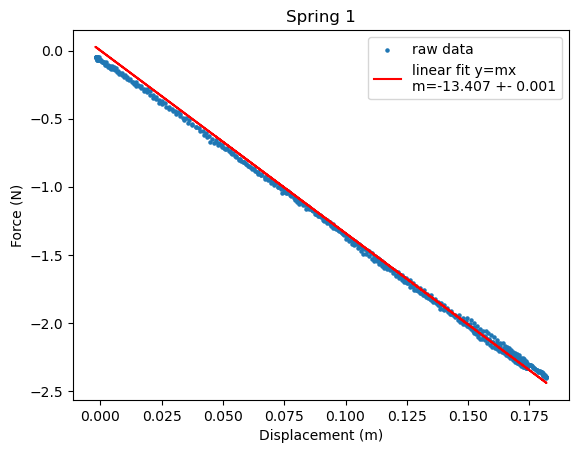

In [365]:
data = pd.read_csv(r"C:\Users\ishaa\Downloads\dataset-84c1deeb-73f0-404b-ac18-c8baea5399dc.csv")
data=np.array(data)
print(np.shape(data))
t=data[100:600,0]
F=data[100:600,1]
x=data[100:600,2]

plt.scatter(x,F,s=5, label = 'raw data')
plt.ylabel('Force (N)')
plt.xlabel('Displacement (m)')
plt.title('Spring 1')
def lin(x,k):
    return -k*x

pars,cov=opt.curve_fit(lin,x,F,p0=[0])
print(pars[0],cov[0,0])
plt.plot(x,lin(x,pars[0]),c='red',label='linear fit y=mx\nm=-13.407 +- 0.001')
plt.legend()

In [350]:
print(np.std(F))
print(len(F))
print(np.std(F)/np.sqrt(len(F)))

0.7589102793733369
500
0.03393949947004275


Reduced χ2 (for linear model y=mx) =1.259


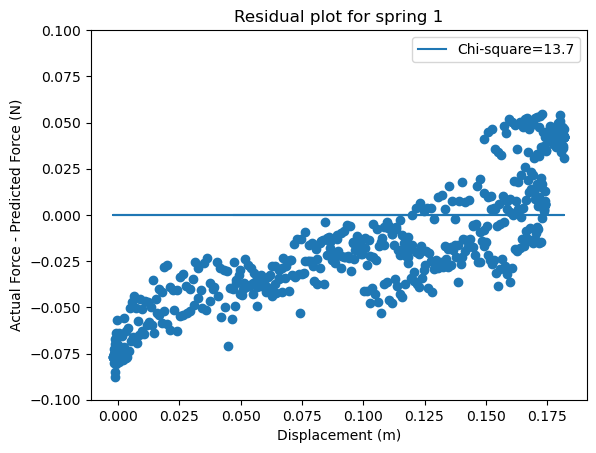

In [353]:
def chisq(predicted, observed, errors):
    res = observed-predicted
    norm_res = res / errors 
    return np.sum(norm_res**2)
reduced_chi2 = chisq(lin(x,pars[0]),F,.033)/(len(t)-1)
plt.scatter(x,F-lin(x,pars[0]))
plt.plot(x,F*0,label='Chi-square=13.7')
plt.ylim(-.1,.1)
print('Reduced χ2 (for linear model y=mx) ={0:.3f}'.format (reduced_chi2))
plt.xlabel('Displacement (m)')
plt.ylabel('Actual Force - Predicted Force (N)')
plt.title('Residual plot for spring 1')
plt.legend()

12.925924805573054 -0.06619090992502644 0.00018546909794627594 2.6656020089333715e-06


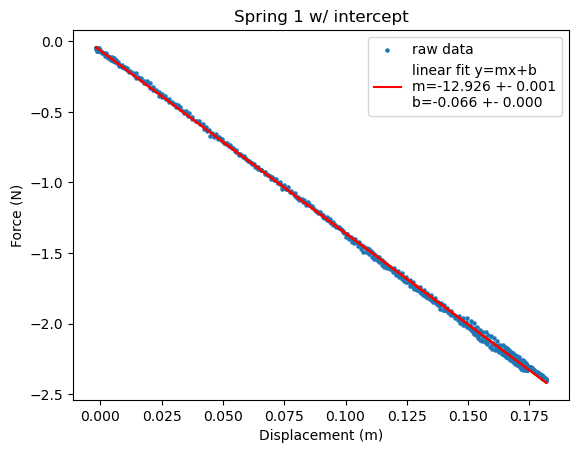

In [369]:
plt.scatter(x,F,s=5,label = 'raw data')
def lin(x,k,b):
    return -k*x+b

pars,cov=opt.curve_fit(lin,x,F,p0=[0,0])
print(pars[0],pars[1],cov[0,0],cov[1,1])
plt.plot(x,lin(x,pars[0],pars[1]),c='red',label='linear fit y=mx+b\nm=-12.926 +- 0.001\nb=-0.066 +- 0.000')

plt.ylabel('Force (N)')
plt.xlabel('Displacement (m)')
plt.title('Spring 1 w/ intercept')
plt.legend()

Reduced χ2 (for linear model y=mx) =3.195


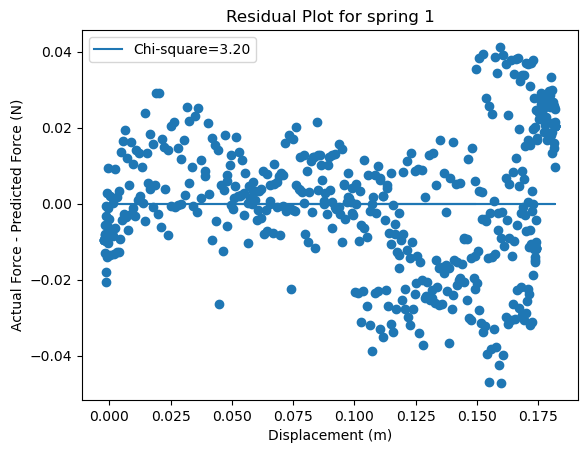

In [294]:
def chisq(predicted, observed, errors):
    res = observed-predicted
    norm_res = res / errors 
    return np.sum(norm_res**2)
reduced_chi2 = chisq(lin(x,pars[0],pars[1]),F,.01)/(len(t)-2)
plt.scatter(x,F-lin(x,pars[0],pars[1]))
plt.plot(x,F*0,label='Chi-square=3.20')
#plt.ylim(-.1,.1)
print('Reduced χ2 (for linear model y=mx) ={0:.3f}'.format (reduced_chi2))
plt.xlabel('Displacement (m)')
plt.ylabel('Actual Force - Predicted Force (N)')
plt.title('Residual Plot for spring 1')
plt.legend()

In [295]:
lhs=np.abs(24-25.269)
rhs=2*np.sqrt(2.4**2+.68**2)
print(lhs,rhs)

1.2689999999999984 4.9889477848540364


In [296]:
def fourier(data,p0,p1,normal):
    t=data[:,0]
    F=data[:,1]
    # p0=np.where(F==np.max(F))[0]
    # p0=np.max(p0)+10
    # p1=p0+450
    pos=data[:,2]
    F=F[p0:p1]
    t=t[p0:p1]
    pos=pos[p0:p1]
    fft = np.fft.fft(F)
    freq = np.fft.fftfreq(len(F))
    mag=np.abs(fft)
    freq=freq[0:(p1-p0)//2]
    mag=mag[0:(p1-p0)//2]
    index=np.where(freq==0)
    freq = np.delete(freq,index)
    mag = np.delete(mag,index)
    benchmark=np.max(mag)
    init=0
    while(len(freq[np.where(mag>benchmark-init)])<normal):
        init=init+1
    return freq[np.where(mag>benchmark-init)]*100
    

2In0g.csv
2In100g.csv
2In120g.csv
2In140g.csv
2In160g.csv
2In200g.csv
2In20g.csv
2In40g.csv
2In60g.csv
2In80g.csv


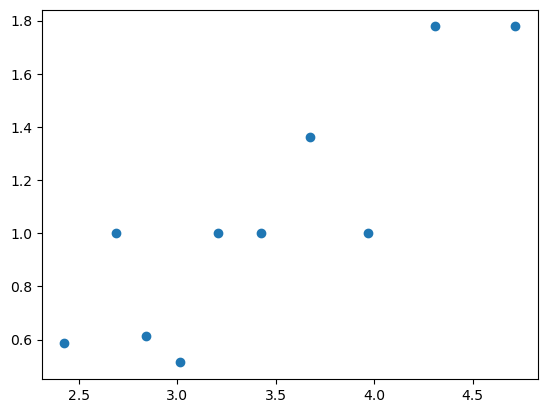

In [297]:
# Assign directory
directory = r"C:\Users\ishaa\Downloads\In Phase2"
mass_in=np.array([0,100,120,140,160,200,20,40,60,80])
mass_in=(mass_in+212)/1000
in2=[]
# Iterate over files in directory
for name in os.listdir(directory):
    print(name)
    # Open file
    data = np.array(pd.read_csv(f"{directory}/{name}"))
    in2.append(fourier(data,350,650,1)[0])
in2=np.array(in2)
plt.scatter(1/mass_in,in2**2)

2Out0g.csv
2Out100g.csv
2Out120g.csv
2Out140g.csv
2Out160g.csv
2Out180g.csv
2Out200g.csv
2Out20g.csv
2Out40g.csv
2Out60g.csv
2Out80g.csv


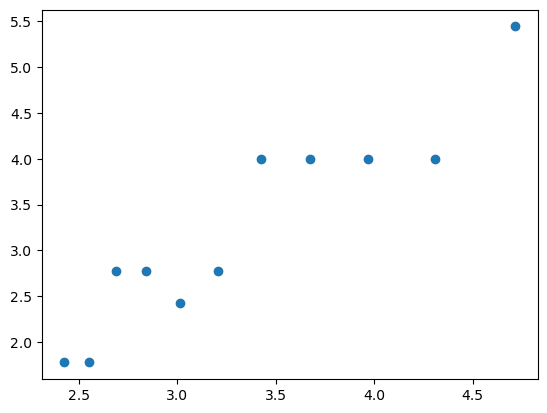

In [298]:
# Assign directory
directory = r"C:\Users\ishaa\Downloads\Out of phase2"
mass=np.array([0,100,120,140,160,180,200,20,40,60,80])
mass=(mass+212)/1000
out2=[]
# Iterate over files in directory
for name in os.listdir(directory):
    print(name)
    # Open file
    data = np.array(pd.read_csv(f"{directory}/{name}"))
    out2.append(fourier(data,350,650,1)[0])
out2=np.array(out2)
plt.scatter(1/mass,out2**2)

2Sup0g.csv
2Sup100g.csv
2Sup120g.csv
2Sup140g.csv
2Sup160g.csv
2Sup180g.csv
2Sup200g.csv
2Sup20g.csv
2Sup40g.csv
2Sup60g.csv
2Sup80g.csv


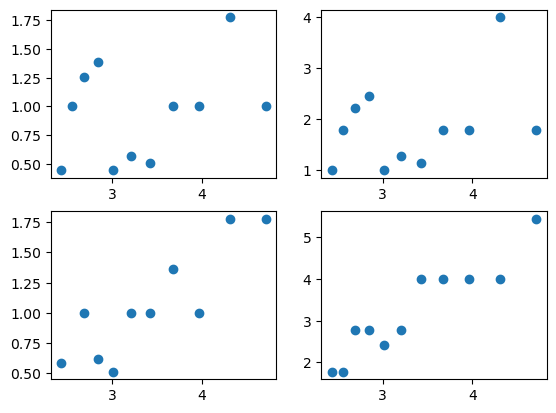

In [299]:
# Assign directory
directory = r"C:\Users\ishaa\Downloads\Superposition2"
mass=np.array([0,100,120,140,160,180,200,20,40,60,80])
mass=(mass+212)/1000
sup2_1=[]
sup2_2=[]
# Iterate over files in directory
for name in os.listdir(directory):
    print(name)
    # Open file
    data = np.array(pd.read_csv(f"{directory}/{name}"))
    sup2_1.append(fourier(data,350,650,2)[0])
    sup2_2.append(fourier(data,350,650,2)[1])
sup2_1,sup2_2=np.array(sup2_1),np.array(sup2_2)
plt.subplot(2,2,1)
plt.scatter(1/mass,sup2_1**2)
plt.subplot(2,2,2)
plt.scatter(1/mass,sup2_2**2)
plt.subplot(2,2,3)
plt.scatter(1/mass_in,in2**2)
plt.subplot(2,2,4)
plt.scatter(1/mass,out2**2)
sup2_1=np.delete(sup2_1,5,axis=0)

In [300]:
# Assign directory
directory = r"C:\Users\ishaa\Downloads\Out of phase1"
mass=np.array([0,100,120,140,160,180,200,20,40,60,80])
mass=(mass+212)/1000
out1=[]
# Iterate over files in directory
for name in os.listdir(directory):
    print(name)
    # Open file
    data = np.array(pd.read_csv(f"{directory}/{name}"))
    out1.append(fourier(data,350,550,1)[0])
out1=np.array(out1)

1Out0g
1Out100g
1Out120g
1Out140g
1Out160g
1Out180g
1Out200g
1Out20g
1Out40g
1Out60g
1Out80g


In [301]:
# Assign directory
directory = r"C:\Users\ishaa\Downloads\In phase1"
mass=np.array([0,100,120,140,160,180,200,20,40,60,80])
mass=(mass+212)/1000
in1=[]
# Iterate over files in directory
for name in os.listdir(directory):
    print(name)
    # Open file
    data = np.array(pd.read_csv(f"{directory}/{name}"))
    in1.append(fourier(data,350,550,1)[0])
in1=np.array(in1)

1in0g
1in100g
1in120g
1in140g
1in160g
1in180g
1in200g
1in20g
1in40g
1in60g
1in80g


In [302]:
# Assign directory
directory = r"C:\Users\ishaa\Downloads\Superposition1"
mass=np.array([0,100,120,140,160,180,200,20,40,60,80])
mass=(mass+212)/1000
sup1_1=[]
sup1_2=[]
# Iterate over files in directory
for name in os.listdir(directory):
    print(name)
    # Open file
    data = np.array(pd.read_csv(f"{directory}/{name}"))
    sup1_1.append(fourier(data,300,600,2)[0])
    sup1_2.append(fourier(data,300,600,2)[1])
sup1_1,sup1_2=np.array(sup1_1),np.array(sup1_2)

1Sup0g
1Sup100g
1Sup120g
1Sup140g
1Sup160g
1Sup180g
1Sup200g
1Sup20g
1Sup40g
1Sup60g
1Sup80g


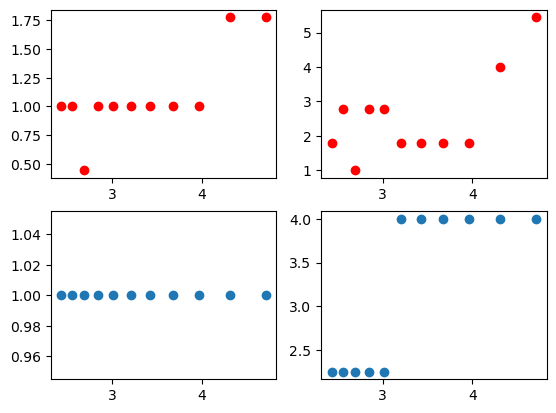

In [303]:
plt.subplot(2,2,1)
plt.scatter(1/mass,sup1_1**2,color='red')
plt.subplot(2,2,2)
plt.scatter(1/mass,sup1_2**2,color='red')
plt.subplot(2,2,3)
plt.scatter(1/mass,in1**2)
plt.subplot(2,2,4)
plt.scatter(1/mass,out1**2)

Reduced χ2 (for linear model y=mx) =0.389


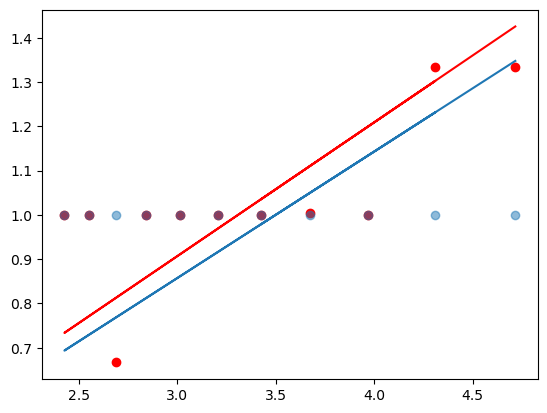

In [304]:
plt.scatter(1/mass,sup1_1,color='red')
plt.scatter(1/mass,in1,alpha=0.5)

def lin(x,n):
    return n*x
pars,cov = opt.curve_fit(lin,1/mass,sup1_1,p0=[0])
pars2,cov2=opt.curve_fit(lin,1/mass,in1,p0=[0])
plt.plot(1/mass,lin(1/mass,pars[0]),color='red')
plt.plot(1/mass,lin(1/mass,pars2[0]))

def chisq(predicted, observed, errors):
    res = observed-predicted
    norm_res = res / errors 
    return np.sum(norm_res**2)
reduced_chi2 = chisq(0,lin(1/mass,pars[0]-pars2[0]),0.1)/(len(mass)-2)
print('Reduced χ2 (for linear model y=mx) ={0:.3f}'.format (reduced_chi2))

Reduced χ2 (for linear model y=mx) =5.905


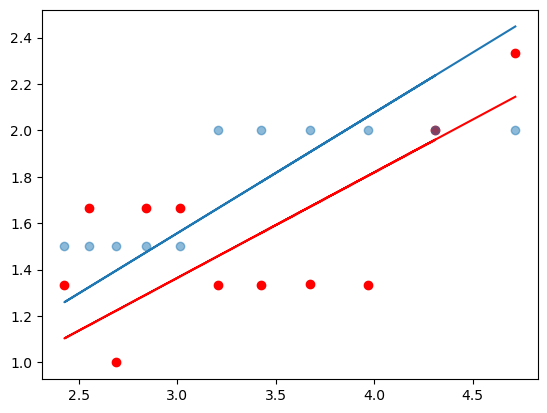

In [305]:
plt.scatter(1/mass,sup1_2,color='red')
plt.scatter(1/mass,out1,alpha=0.5)

def lin(x,n):
    return n*x
pars,cov = opt.curve_fit(lin,1/mass,sup1_2,p0=[0])
pars2,cov2=opt.curve_fit(lin,1/mass,out1,p0=[0])
plt.plot(1/mass,lin(1/mass,pars[0]),color='red')
plt.plot(1/mass,lin(1/mass,pars2[0]))

def chisq(predicted, observed, errors):
    res = observed-predicted
    norm_res = res / errors 
    return np.sum(norm_res**2)
reduced_chi2 = chisq(0,lin(1/mass,pars[0]-pars2[0]),0.1)/(len(mass)-2)
print('Reduced χ2 (for linear model y=mx) ={0:.3f}'.format (reduced_chi2))

Reduced χ2 (for linear model y=mx) =2.725
Reduced χ2 (for linear model y=mx) =17.344
Reduced χ2 (for linear model y=mx) =7.693


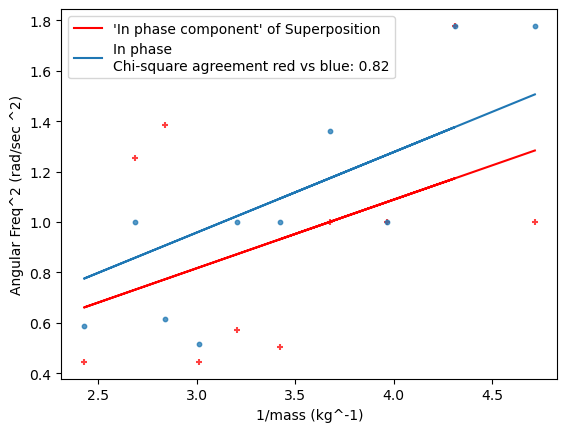

In [306]:
plt.scatter(1/mass_in,sup2_1**2,color='red',alpha=0.75,s=20,marker="+")
plt.scatter(1/mass_in,in2**2,alpha=0.75,s=10)

def lin(x,n):
    return n*x
pars,cov = opt.curve_fit(lin,1/mass_in,sup2_1**2,p0=[0])
pars2,cov2=opt.curve_fit(lin,1/mass_in,in2**2,p0=[0])
plt.plot(1/mass_in,lin(1/mass_in,pars[0]),color='red',label="'In phase component' of Superposition")
plt.plot(1/mass_in,lin(1/mass_in,pars2[0]),label='In phase\nChi-square agreement red vs blue: 0.82')

def chisq(predicted, observed, errors):
    res = observed-predicted
    norm_res = res / errors 
    return np.sum(norm_res**2)
reduced_chi2 = chisq(0,lin(1/mass_in,pars[0]-pars2[0]),0.1)/(len(mass)-1)
print('Reduced χ2 (for linear model y=mx) ={0:.3f}'.format (reduced_chi2))
plt.xlabel('1/mass (kg^-1)')
plt.ylabel('Angular Freq^2 (rad/sec ^2)')
plt.legend()

reduced_chi2 = chisq(lin(1/mass_in,pars[0]),sup2_1**2,0.1)/(len(mass_in)-1)
print('Reduced χ2 (for linear model y=mx) ={0:.3f}'.format (reduced_chi2))
reduced_chi2 = chisq(lin(1/mass_in,pars2[0]),in2**2,0.1)/(len(mass_in)-1)
print('Reduced χ2 (for linear model y=mx) ={0:.3f}'.format (reduced_chi2))

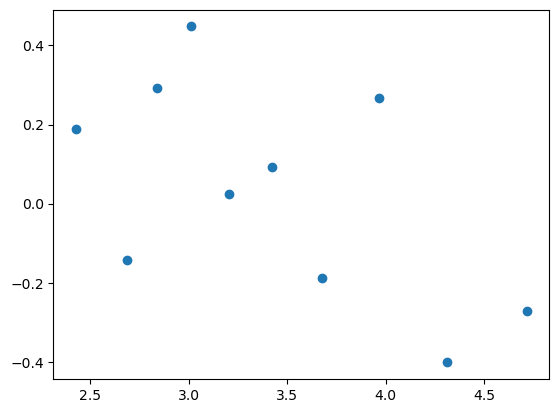

In [307]:
plt.scatter(1/mass_in,lin(1/mass_in,pars2[0])-in2**2)

Reduced χ2 (for linear model y=mx) =26.815
Reduced χ2 (for linear model y=mx) =63.893
Reduced χ2 (for linear model y=mx) =26.119


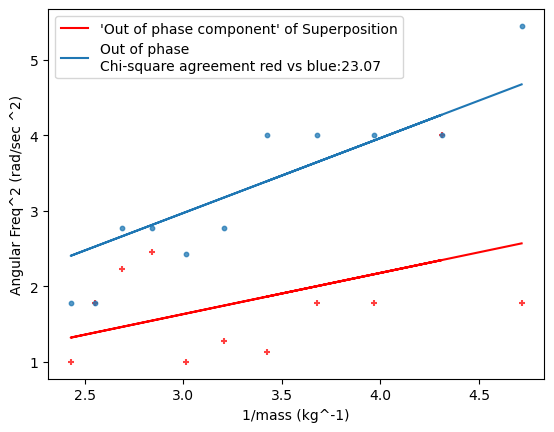

In [308]:
plt.scatter(1/mass,sup2_2**2,color='red',alpha=0.75,s=20,marker="+")
plt.scatter(1/mass,out2**2,alpha=0.75,s=10)

def lin(x,n):
    return n*x
pars,cov = opt.curve_fit(lin,1/mass,sup2_2**2,p0=[0])
pars2,cov2=opt.curve_fit(lin,1/mass,out2**2,p0=[0])
plt.plot(1/mass,lin(1/mass,pars[0]),color='red',label="'Out of phase component' of Superposition")
plt.plot(1/mass,lin(1/mass,pars2[0]),label='Out of phase\nChi-square agreement red vs blue:23.07')

def chisq(predicted, observed, errors):
    res = observed-predicted
    norm_res = res / errors 
    return np.sum(norm_res**2)
reduced_chi2 = chisq(lin(1/mass,pars2[0]**2),lin(1/mass,pars[0]**2),0.5)/(len(mass)-2)
print('Reduced χ2 (for linear model y=mx) ={0:.3f}'.format (reduced_chi2))
plt.xlabel('1/mass (kg^-1)')
plt.ylabel('Angular Freq^2 (rad/sec ^2)')
plt.legend()
reduced_chi2 = chisq(lin(1/mass,pars[0]),sup2_2**2,0.1)/(len(mass)-1)
print('Reduced χ2 (for linear model y=mx) ={0:.3f}'.format (reduced_chi2))
reduced_chi2 = chisq(lin(1/mass,pars2[0]),out2**2,0.1)/(len(mass)-1)
print('Reduced χ2 (for linear model y=mx) ={0:.3f}'.format (reduced_chi2))

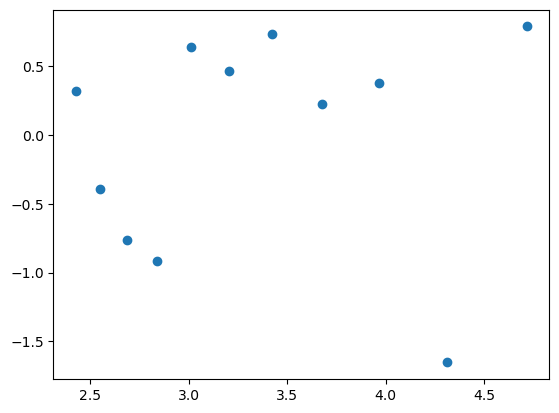

In [309]:
plt.scatter(1/mass,lin(1/mass,pars[0])-sup2_2**2)

[1.2 2.4]


Text(0.5, 1.0, "'Superposition' of Normal Modes")

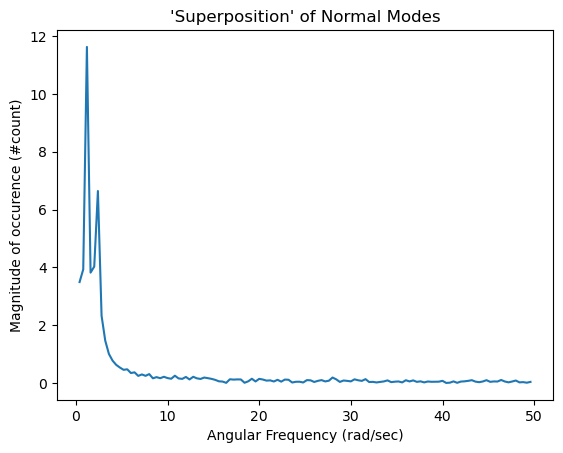

In [345]:
#Superposition for mass2
data = pd.read_csv(r"C:\Users\ishaa\Downloads\Superposition2\2Sup0g.csv")
data=np.array(data)

#plt.plot(data[:,0],data[:,1])
p0,p1=350,600
t=data[:,0]
F=data[:,1]
pos=data[:,2]
F=F[p0:p1]
t=t[p0:p1]
pos=pos[p0:p1]
fft = np.fft.fft(F)
freq = np.fft.fftfreq(len(F))
mag=np.abs(fft)
freq=freq[0:(p1-p0)//2]
mag=mag[0:(p1-p0)//2]
index=np.where(freq==0)
freq = np.delete(freq,index)*100
mag = np.delete(mag,index)
plt.plot(freq[:len(freq)],mag)
print(freq[np.where(mag>5)])
#plt.plot(2*np.ones(10),np.arange(0,10,1))
plt.xlabel('Angular Frequency (rad/sec)')
plt.ylabel('Magnitude of occurence (#count)')
plt.title("'Superposition' of Normal Modes")

[0.012 0.02 ]


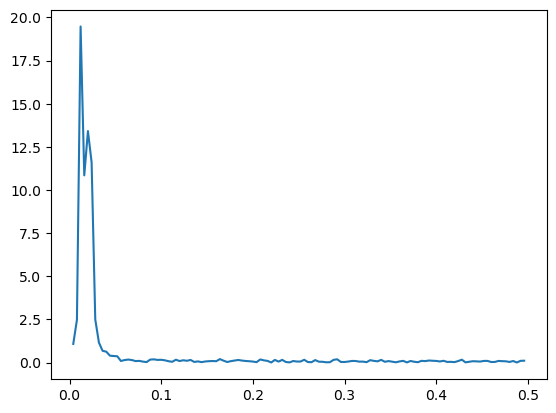

In [311]:
#Superposition mass1
data=pd.read_csv(r"C:\Users\ishaa\Downloads\Superposition1\1Sup0g")
data=np.array(data)

p0,p1=300,550
t=data[:,0]
F=data[:,1]
pos=data[:,2]
F=F[p0:p1]
t=t[p0:p1]
pos=pos[p0:p1]
fft = np.fft.fft(F)
freq = np.fft.fftfreq(len(F))
mag=np.abs(fft)
freq=freq[0:(p1-p0)//2]
mag=mag[0:(p1-p0)//2]
index=np.where(freq==0)
freq = np.delete(freq,index)
mag = np.delete(mag,index)
plt.plot(freq[:len(freq)],mag)
print(freq[np.where(mag>12)])

[2.]


Text(0.5, 1.0, 'Out of phase Normal Mode')

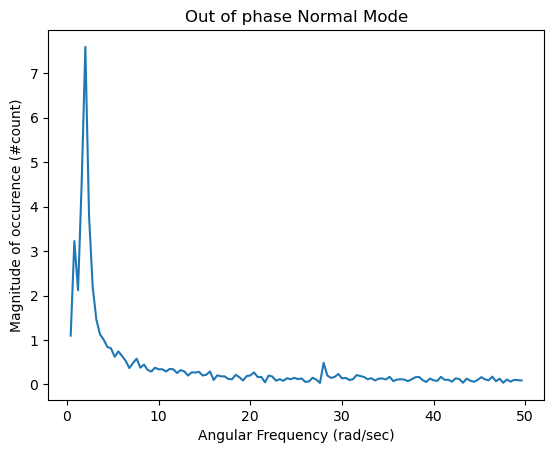

In [312]:
#Out of phase mass2
data=pd.read_csv(r"C:\Users\ishaa\Downloads\Out of phase2\2Out80g.csv")
data=np.array(data)

p0,p1=350,600
t=data[:,0]
F=data[:,1]
pos=data[:,2]
F=F[p0:p1]
t=t[p0:p1]
pos=pos[p0:p1]
fft = np.fft.fft(F)
freq = np.fft.fftfreq(len(F))
mag=np.abs(fft)
freq=freq[0:(p1-p0)//2]
mag=mag[0:(p1-p0)//2]
index=np.where(freq==0)
freq = np.delete(freq,index)*100
mag = np.delete(mag,index)
plt.plot(freq[:len(freq)],mag,label='2.4 rad/s')
print(freq[np.where(mag>5)])
plt.xlabel('Angular Frequency (rad/sec)')
plt.ylabel('Magnitude of occurence (#count)')
plt.title('Out of phase Normal Mode')


In [313]:
# #Out of phase mass 2 (smoothed)
# data1=pd.read_csv(r"C:\Users\ishaa\Downloads\out of phase (2).csv")
# data1=np.array(data1)
# freq,mag=fourier(data1,300,600)
# plt.plot(freq[:len(freq)],mag)
# peaks,_=find_peaks(freq[:len(freq)],height=20)
# print(freq[np.where(mag>20)])
# plt.xlim(0,0.03)

[0.8 1.2]


Text(0.5, 1.0, 'In phase Normal Mode')

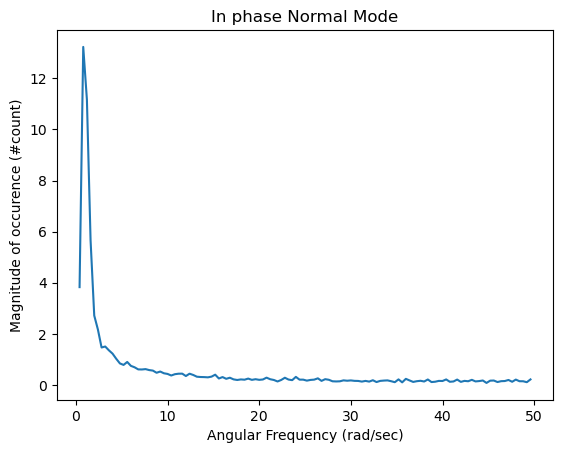

In [314]:
#In phase mass2
data=pd.read_csv(r"C:\Users\ishaa\Downloads\In phase2\2In140g.csv")
data=np.array(data)

p0,p1=350,600
t=data[:,0]
F=data[:,1]
pos=data[:,2]
F=F[p0:p1]
t=t[p0:p1]
pos=pos[p0:p1]
fft = np.fft.fft(F)
freq = np.fft.fftfreq(len(F))
mag=np.abs(fft)
freq=freq[0:(p1-p0)//2]
mag=mag[0:(p1-p0)//2]
index=np.where(freq==0)
freq = np.delete(freq,index)*100
mag = np.delete(mag,index)
plt.plot(freq[:len(freq)],mag, label='1.2 rad/s')
print(freq[np.where(mag>10)])
plt.xlabel('Angular Frequency (rad/sec)')
plt.ylabel('Magnitude of occurence (#count)')
plt.title('In phase Normal Mode')


[0.03 0.11]


Text(0.5, 1.0, 'Fourier transform example')

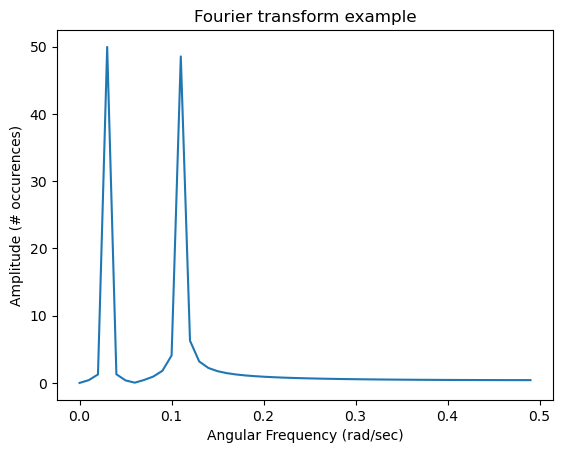

In [315]:
#Testing that the fourier transform function works
x=np.linspace(0,6.28,100)
#this is the test function
def func(var):
    return np.sin(3*var)+np.sin(11*var)
#take the fourier transform
fft = np.fft.fft(func(x))
freq = np.fft.fftfreq(len(x))
mag=np.abs(fft)

#remove the negative copies
index=np.where(freq<0)
freq=np.delete(freq,index)
mag=np.delete(mag,index)

plt.plot(freq[:len(freq)],mag)
print(freq[np.where(mag>40)])
#It's off by 100 for some reason, which works in our favor?
#When we add a factor to the front of the sine terms, there is a new freq of 12?
plt.xlabel('Angular Frequency (rad/sec)')
plt.ylabel('Amplitude (# occurences)')
plt.title('Fourier transform example')